### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA


from sklearn.datasets import load_diabetes

## Preprocessing the data

In [2]:
np.random.seed(0)

In [3]:
data = pd.read_csv('data_dm3.csv',header = None)
abs(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,...,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.799166,0.816937,0.809361,0.800130,0.798199,0.810407,0.807030,0.769182,0.796518,0.806212,...,0.801916,0.781513,0.780954,0.792527,0.795571,0.783839,0.789121,0.804923,0.794664,152.133484
std,0.601792,0.577381,0.587977,0.600506,0.603076,0.586532,0.591180,0.639754,0.605300,0.592298,...,0.598114,0.624596,0.625296,0.610528,0.606547,0.621667,0.614934,0.594051,0.607738,77.093005
min,0.003012,0.000001,0.008219,0.000029,0.003223,0.000057,0.001690,0.003924,0.006537,0.002066,...,0.000023,0.000945,0.003382,0.001275,0.000025,0.000785,0.003455,0.001945,0.001266,25.000000
25%,0.304355,0.363305,0.350734,0.335621,0.314847,0.350868,0.340816,0.263278,0.308617,0.324330,...,0.329673,0.287346,0.303943,0.302390,0.265173,0.299246,0.313351,0.329565,0.289527,87.000000
50%,0.675856,0.682751,0.703561,0.679833,0.677050,0.703397,0.711939,0.617576,0.661776,0.680234,...,0.671914,0.639770,0.610327,0.688542,0.720280,0.639329,0.634557,0.698917,0.677732,140.500000
75%,1.194774,1.156652,1.182975,1.104139,1.122084,1.127991,1.142238,1.094563,1.170682,1.158544,...,1.178665,1.136796,1.138918,1.118267,1.181681,1.166851,1.132098,1.179467,1.182404,211.500000
max,3.149247,2.862871,3.057543,3.057612,3.173713,3.137950,3.199205,3.626525,3.099090,3.032505,...,3.059475,3.206539,3.255462,3.561763,3.167962,3.351254,3.028940,3.637684,2.918321,346.000000


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,2.411344e-17,-2.310871e-17,1.210382e-17,-1.054963e-17,1.632681e-17,-2.310871e-17,2.474140e-17,2.662526e-17,2.511817e-18,-1.004727e-17,...,-7.786632e-18,-3.591898e-17,7.535450e-18,-2.122485e-17,1.004727e-18,1.858744e-17,-2.511817e-19,-1.306145e-17,8.037814e-18,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


#### Answer:

The data seems to be centered since the average of each corvariate is arount 10^(-3) whereas the mean of the absolute value of the column is just generally just bellow 1: 
                                               

                                                10^(-3)<<<1

We can therefore considere that the mean isn't equal to 0 (excatly) because of numerical errors

Moreover, the std is clearly around 1 so yes, we can consider the dataset standardised

The dataset is both centered and standardised, so it is normalized

In [5]:
n,p=np.shape(data)

X = data.iloc[:,0:p-1]
Y = data.iloc[:,p-1:p]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

In [7]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [8]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.021454,0.151997,0.057969,-0.088850,-0.120646,-0.234014,-0.217718,0.009486,0.103903,-0.063445,...,-0.065359,0.119452,-0.000342,-0.164787,0.034770,0.128812,0.069239,-0.260577,0.022681,-0.071944
std,0.944962,1.069325,1.028899,0.935437,0.980504,1.062325,0.942211,1.029798,1.040569,1.136938,...,1.031972,1.074532,0.918946,1.115515,1.007209,0.982911,0.977625,0.926313,0.900942,1.030449
min,-3.098153,-2.799279,-2.906171,-2.666984,-2.497357,-2.475759,-2.764368,-3.076819,-2.460676,-2.806273,...,-2.254325,-2.137152,-2.802923,-2.707731,-2.778589,-2.289676,-2.133848,-2.414280,-2.603340,-2.956887
25%,-0.436495,-0.543838,-0.675968,-0.712338,-0.767488,-0.904490,-0.839150,-0.604700,-0.586032,-0.873196,...,-0.817249,-0.631373,-0.629609,-0.863911,-0.597007,-0.544131,-0.584913,-0.960948,-0.561191,-0.650797
50%,0.106592,0.312843,0.031669,-0.125343,-0.112961,-0.252010,-0.273268,0.098535,0.091912,-0.023864,...,-0.000190,0.177521,0.050542,-0.159812,0.058479,0.154520,0.052286,-0.162277,-0.132527,-0.102055
75%,0.661208,0.827646,0.723087,0.583184,0.487398,0.567351,0.381159,0.661046,0.762400,0.720182,...,0.611179,0.821620,0.634618,0.567028,0.842010,0.914210,0.748965,0.365712,0.666605,0.600167
max,2.494580,2.293984,2.999541,2.604329,1.827183,3.141363,2.142685,2.436295,3.156589,3.005084,...,2.406356,2.515860,2.507454,3.184523,2.226861,2.180210,2.697165,2.380333,2.490996,2.552112


In [9]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
count,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,...,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02
mean,1.140410e-17,1.341659e-18,-2.683318e-17,1.421320e-17,-6.708296e-18,2.012489e-18,-2.482070e-17,1.073327e-17,-2.683318e-18,-1.274576e-17,...,1.207493e-17,1.643533e-17,1.484211e-17,1.647725e-17,-1.341659e-17,3.354148e-18,3.689563e-17,1.609991e-17,3.689563e-18,-1.056557e-17
std,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,...,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00
min,-2.842234e+00,-2.878283e+00,-3.062737e+00,-2.833315e+00,-3.118443e+00,-2.896247e+00,-2.849770e+00,-3.647292e+00,-2.836633e+00,-2.576061e+00,...,-3.478308e+00,-3.088417e+00,-3.140250e+00,-2.621571e+00,-3.555818e+00,-3.123591e+00,-2.716745e+00,-3.056556e+00,-2.423386e+00,-2.732175e+00
25%,-7.111673e-01,-7.110523e-01,-7.265395e-01,-6.763777e-01,-6.269789e-01,-6.994111e-01,-7.092568e-01,-6.447571e-01,-6.541403e-01,-6.840601e-01,...,-6.780078e-01,-6.797643e-01,-5.476528e-01,-6.498142e-01,-6.144426e-01,-7.244510e-01,-6.213799e-01,-5.976271e-01,-7.209992e-01,-6.746308e-01
50%,-1.120897e-02,3.113932e-02,6.229600e-02,3.240461e-03,-1.055833e-02,-2.998449e-02,-7.780401e-03,2.290843e-02,1.269886e-02,2.460399e-02,...,6.304286e-02,-5.538395e-02,8.783478e-03,-2.807176e-02,-1.341632e-02,1.971228e-02,-1.177863e-02,3.339667e-02,1.141809e-02,-9.474177e-02
75%,6.779206e-01,6.367274e-01,6.946894e-01,6.980231e-01,6.846028e-01,6.815231e-01,6.872344e-01,5.623391e-01,5.947442e-01,6.561558e-01,...,6.434871e-01,6.372904e-01,6.913327e-01,5.752377e-01,7.433241e-01,6.926403e-01,5.686617e-01,6.071692e-01,6.890798e-01,7.461155e-01
max,2.515472e+00,2.653398e+00,2.697741e+00,2.986172e+00,3.128886e+00,3.024286e+00,3.110305e+00,3.642187e+00,2.621377e+00,3.122850e+00,...,2.740678e+00,2.759037e+00,2.748690e+00,3.316104e+00,2.822844e+00,2.860535e+00,3.347845e+00,2.634897e+00,3.553084e+00,2.711230e+00


In [10]:
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

In [11]:
def det_coef(y,y_pred):
    R2 = 1 - np.sum((y_pred-y)**2)/np.sum((y-np.mean(y))**2)
    return R2

def mean_sq(y,y_pred):
    ms = np.sum((y_pred-y)**2)/len(y)
    return ms

In [12]:
reg = lr().fit(X_train,np.asarray(Y_train))
coefs = reg.coef_
print("The determination coefficient is :", reg.score(X_test,Y_test))

y_prediction = reg.predict(X_test)
print("The mean squared is :", mean_squared_error(Y_test,y_prediction))

print("\nOur fonctions give us R^2 =", det_coef(np.asarray(Y_test),np.asarray(y_prediction))
      ," and MSE =", mean_sq(np.asarray(Y_test),np.asarray(y_prediction)))

The determination coefficient is : 0.07230742060375461
The mean squared is : 4605.4496603639

Our fonctions give us R^2 = 0.07230742060375461  and MSE = 4605.4496603639


In [13]:
df_test['OLS'] =y_prediction.reshape(-1)
df_coef['OLS'] =coefs.reshape(-1)
df_coef

,OLS
0,7.303027e+14
1,-1.776468e+15
2,8.225344e+14
3,-2.392854e+15
4,-3.548645e+15
...,...
205,-1.818151e+15
206,9.401053e+12
207,-4.552487e+14
208,2.174144e+15


# PCA

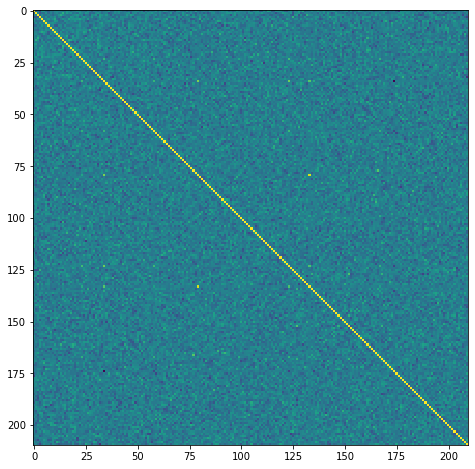

In [14]:
plt.figure(1,figsize=(10,8))
corr= X.corr()
plt.imshow(corr,interpolation='nearest')
plt.show()

In [15]:
U,s,V = np.linalg.svd(X)
w,v = np.linalg.eig(1/(len(X)-1) * X.T@X)


diff = [s[i]**2/(n-1)-w[i] for i in range(len(s))]
diff = np.asarray(diff)


all1 = len(diff)
success = len(diff[diff<10e-15])

In [16]:
pca = PCA(2)
pca.fit(X)

PCA(n_components=2)

In [17]:
ex_var = pca.explained_variance_ratio_
print("The first column can explain",ex_var[0]*100,'% of the total variance')
print("The first column can explain",ex_var[1]*100,'% of the total variance')
print("These 2 columns can explain",sum(ex_var)*100,'% of the total variance')

PC1 , PC2 = pca.components_[0],pca.components_[1]

The first column can explain 2.5628688070241643 % of the total variance
The first column can explain 2.2549765712135508 % of the total variance
These 2 columns can explain 4.817845378237714 % of the total variance


The projector is the transpose of the components of the PCA:

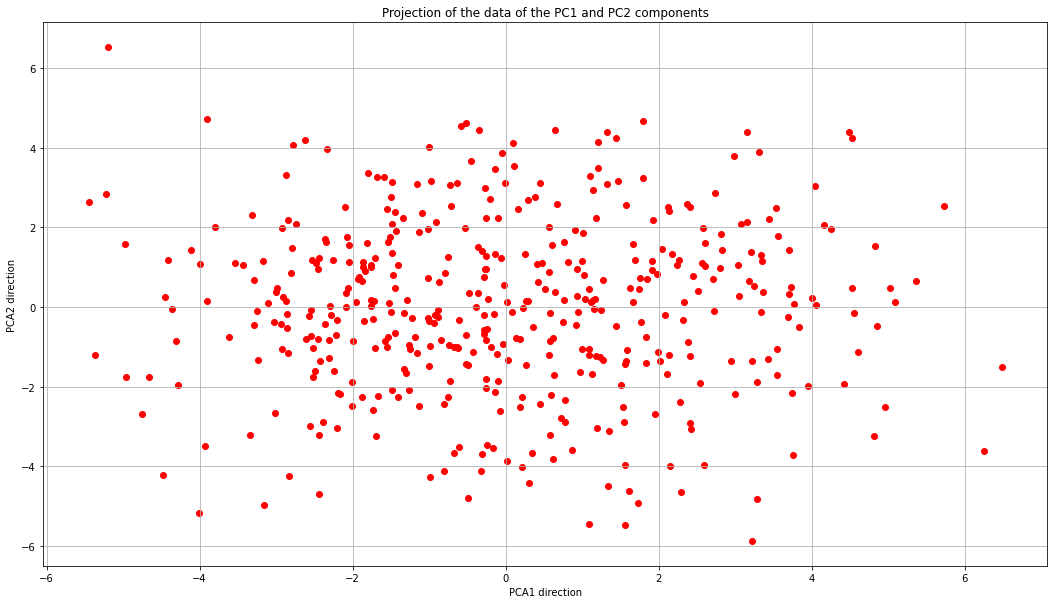

In [18]:
proj = np.array(X@pca.components_.T)

plt.figure(figsize=(18,10))
plt.scatter(proj[:,0],proj[:,1],color = 'r')
plt.xlabel('PCA1 direction')
plt.ylabel('PCA2 direction')
plt.grid()
plt.title("Projection of the data of the PC1 and PC2 components")
plt.show()


In [19]:
U, s, useless = np.linalg.svd(np.asarray(X).T@np.asarray(X))

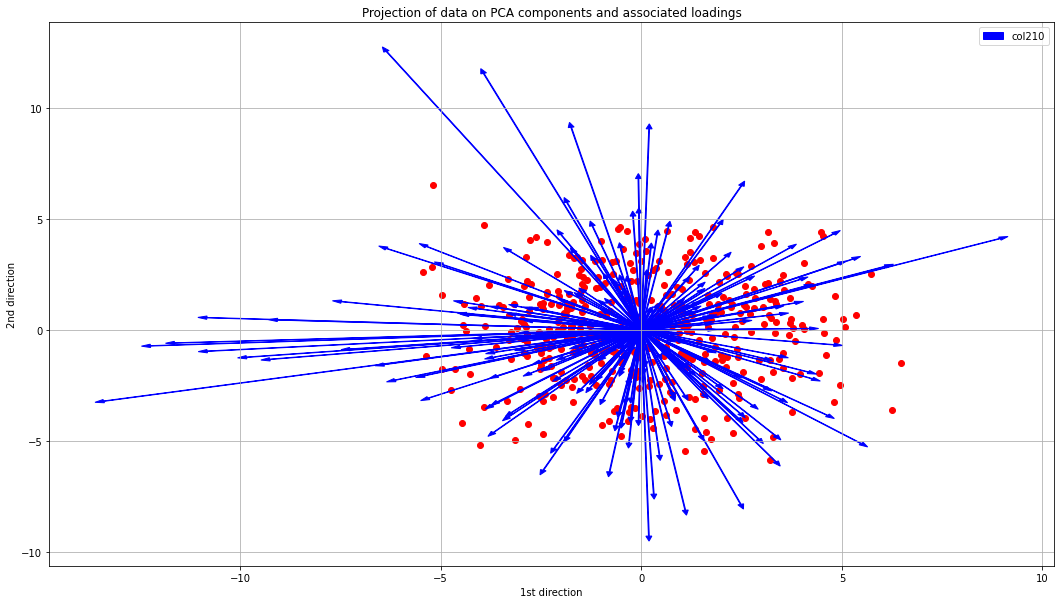

In [20]:
X_pca = pca.transform(X_train)
loadings = np.sqrt(s) * U
plt.figure(figsize=(18,10))
plt.grid()
plt.scatter(proj[:,0],proj[:,1],color= 'red')
plt.xlabel('1st direction')
plt.ylabel('2nd direction')
plt.title("Projection of data on PCA components and associated loadings")
for i in range(np.shape(loadings)[0]):
    arrow = plt.arrow(0,0, loadings[i,0], loadings[i,1],head_width = 0.15,width = 0.02, label = 'col'+str(i),color= 'b')
    plt.legend([arrow,], ['col'+str(i+1),])
plt.show()

These loadings describe how much each variable contribute to the PC1 and PC2.

In [21]:
# Compute projected data for both the train and the test data:
proj_train = X_train @ pca.components_.T
proj_test = X_test @ pca.components_.T

# Apply the linear regression of the sklearn library to the low dimensional data:
reg = lr().fit(proj_train,Y_train)

#print the determination coefficient and the MSE of the test data
print("The determination coefficient is :", reg.score(proj_test,Y_test))
y_prediction = reg.predict(proj_test)
print("The mean squared is :", mean_squared_error(Y_test,y_prediction))
print("\nOur fonctions give us R^2 =", det_coef(np.asarray(Y_test),np.asarray(y_prediction))
      ," and MSE =", mean_sq(np.asarray(Y_test),np.asarray(y_prediction)))

# Add a column named pca_ols to the df_test dataframe that contains the predicted values for the test sample.
df_test['pca_ols'] = y_prediction.reshape(-1)


The determination coefficient is : 0.11572659469087898
The mean squared is : 4389.898921903787

Our fonctions give us R^2 = 0.11572659469087898  and MSE = 4389.898921903787


# Regularisation

In [22]:
# Apply the LassoCV
from sklearn.linear_model import LassoCV as lcv
lass = lcv(alphas=np.logspace(-3,1,30)).fit(X_train,np.asarray(Y_train).reshape(-1))

# Print the determination coefficient and the MSE of the test data
print("The determination coefficient is :", lass.score(X_test,Y_test))
y_prediction = lass.predict(X_test)
y_pred = [[y_prediction[i]] for i in range(len(y_prediction))]
print("The mean squared is :", mean_squared_error(Y_test,y_pred))

print("\nOur fonctions give us R^2 =", det_coef(np.asarray(Y_test),np.asarray(y_pred))
      ," and MSE =", mean_sq(np.asarray(Y_test),np.asarray(y_pred)))

The determination coefficient is : 0.34127155928683606
The mean squared is : 3270.200431622382

Our fonctions give us R^2 = 0.34127155928683606  and MSE = 3270.200431622382


In [23]:
print("Le paramètre alpha choisit est: alpha =", lass.alpha_)

Le paramètre alpha choisit est: alpha = 5.298316906283707


In [24]:
df_test['lasso']=y_prediction
df_coef['lasso']=lass.coef_

In [25]:
# Apply the RidgeCV
from sklearn.linear_model import RidgeCV as rcv
rid = rcv(alphas=np.logspace(-1,2,30)).fit(X_train,np.asarray(Y_train).reshape(-1))

# Print the determination coefficient and the MSE of the test data
print("The determination coefficient is :", rid.score(X_test,Y_test))
y_prediction = rid.predict(X_test)
y_pred = [[y_prediction[i]] for i in range(len(y_prediction))]
print("The mean squared is :", mean_squared_error(Y_test,y_pred))

print("\nOur fonctions give us R^2 =", det_coef(np.asarray(Y_test),np.asarray(y_pred))
      ," and MSE =", mean_sq(np.asarray(Y_test),np.asarray(y_pred)))

The determination coefficient is : 0.32233713301144906
The mean squared is : 3364.1987549849746

Our fonctions give us R^2 = 0.32233713301144906  and MSE = 3364.1987549849746


In [26]:
print("Le paramètre alpha choisit est: alpha =", rid.alpha_)

Le paramètre alpha choisit est: alpha = 48.93900918477494


In [27]:
df_test['Ridge']=y_prediction
df_coef['Ridge']=rid.coef_

# Variable selection

In [28]:
def choose_variable(Xo,y,count):
    Xs = np.copy(Xo)
    n,p = np.shape(Xs)
    res=[]
    for i in range(p):
        X = Xs[:,i].reshape(-1,1)
        y = np.asarray(y).reshape(-1)
        reg = lr().fit(X, y)
        tk = reg.coef_[0]
        sigk = np.sqrt(1/(n-2) * np.sum((y-tk*X)**2))
        res.append(np.abs(tk)/sigk*n)
    pv = 2*(1 - stats.norm.cdf(res))
    res0 = res.copy()
    for i in range(count):
        res[res.index(max(res))]= float('-inf')
    x = res.index(max(res))
    return x ,pv, res0
        

def forward_variable_selection_without_stop(Xc,y):
    X=np.copy(Xc)
    count =0
    variable_indexes = []
    while count !=np.shape(X)[1]:
        index = choose_variable(X,y,count)[0]
        variable_indexes.append(index)
        count=count+1
    return np.asarray(variable_indexes).reshape(-1) 

In [29]:
res = forward_variable_selection_without_stop(X_train,Y_train)
res

array([ 58, 123, 167,  34, 174,  23, 133,  99,  79,  17,  13, 154, 172,
       168,  43,  49,  27, 112, 152, 131, 121, 127, 159, 146, 130,  25,
       141,  47, 138, 196,  22, 208,  98, 136, 162,  61, 113, 190, 116,
       200, 176,  77,  53, 182,  20,  19,  30,  33,   2,  96, 103,  85,
       129,   3, 161,  84,  83, 149,  28,  48, 191,  10, 140,  59, 153,
        26,  32,  80, 102, 203,  45, 207, 100, 183,  18, 166,   9, 184,
       150, 158, 118,  57, 143, 199, 188,  24, 187,  90,  92, 180, 119,
        36, 104, 135, 117, 185, 181, 101, 175,  87,  76, 177,   7, 157,
        93, 142, 132,  37, 155, 128,  94, 164, 170,  31,  35, 209, 122,
         4, 198, 115,  75,  15, 108, 120,   6, 165, 111, 192, 134,  71,
       114,  63, 126, 169, 204, 195,  89,  66,  46,  88, 105, 106, 193,
        64,  51, 156,  60, 110,   5, 201,  82,  12, 194,  72,  42, 163,
        52, 144, 197,  56,  70, 179,  97,  38,  65,  86, 151,   8,  39,
        21,  69,  91, 173,   0,   1,  74, 107, 147, 189, 137, 17

In [30]:
pv_lim = 0.05


def forward_variable_selection(Xc,y,eps):
    X=np.copy(Xc)
    count =0
    variable_indexes = []
    pvs, reses = [],[]
    while count !=np.shape(X)[1]:
        index, pv, res = choose_variable(X,y,count)
        pvs.append(pv)
        reses.append(res)
        variable_indexes.append(index)
        count=count+1
    return np.asarray(variable_indexes).reshape(-1),pvs,reses

indexes,pvs,reses =forward_variable_selection(X_train,Y_train,0)

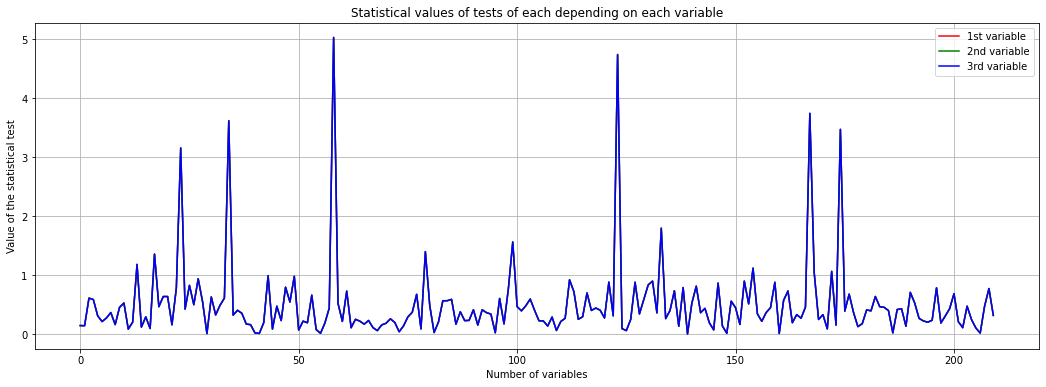

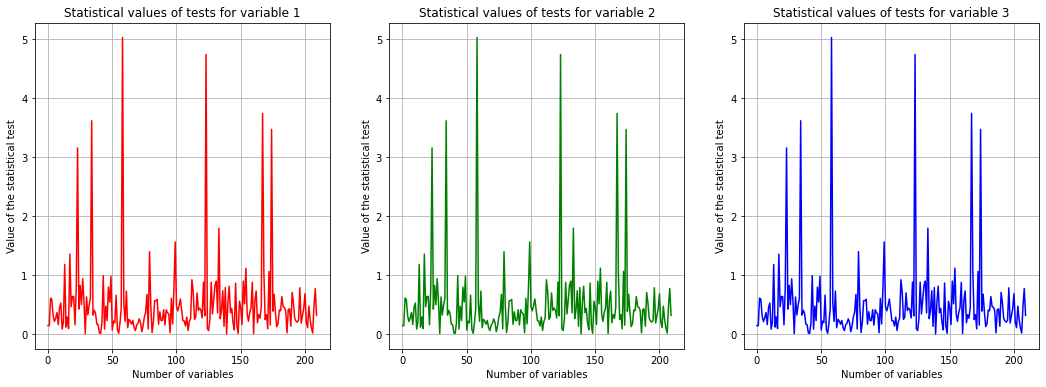

In [31]:
plt.figure(1,figsize=(18,6))
plt.title('Statistical values of tests of each depending on each variable')
plt.grid()
var = [k for k in range(210)]
plt.plot(var,reses[0],c='r', label='1st variable')
plt.plot(var,reses[1],c='g', label='2nd variable')
plt.plot(var,reses[2],c='b', label='3rd variable')
plt.xlabel('Number of variables')
plt.ylabel('Value of the statistical test')
plt.legend()
plt.show()

plt.figure(2,figsize=(18,6))
plt.subplot(131)
plt.title('Statistical values of tests for variable 1')
plt.xlabel('Number of variables')
plt.ylabel('Value of the statistical test')
plt.grid()
plt.plot(reses[0],c='r', label='1st variable')

plt.subplot(132)
plt.title('Statistical values of tests for variable 2')
plt.xlabel('Number of variables')
plt.ylabel('Value of the statistical test')
plt.grid()
plt.plot(reses[1],c='g', label='2nd variable')

plt.subplot(133)
plt.title('Statistical values of tests for variable 3')
plt.xlabel('Number of variables')
plt.ylabel('Value of the statistical test')
plt.grid()
plt.plot(reses[2],c='b', label='3rd variable')
plt.show()

#### We can see that the statistical values of the three variables form a perfect juxtapostion

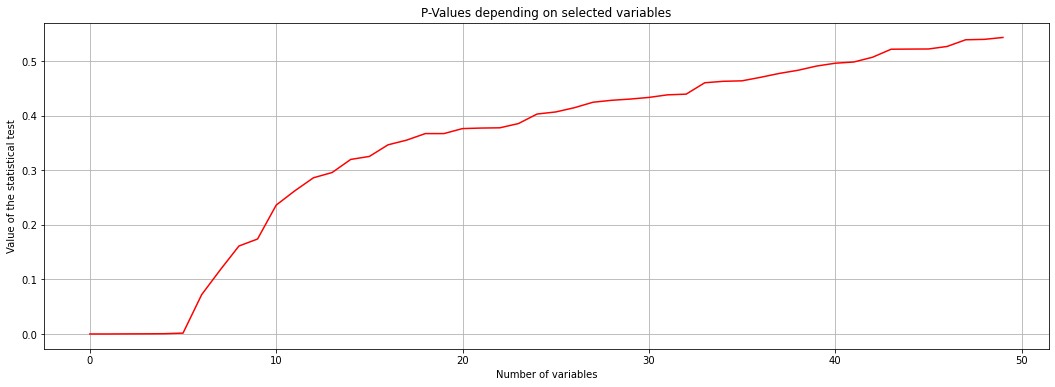

0.3673879261912085


In [32]:
plt.figure(figsize=(18,6))
plt.title('P-Values depending on selected variables')
plt.grid()
abso = [k for k in range(50)]
test = [0.95 for k in range(50)]
plt.plot(abso,pvs[0][indexes][:50],c='r' )
#plt.plot(abso,test)
#plt.ylim([0, 1])
plt.xlabel('Number of variables')
plt.ylabel('Value of the statistical test')
plt.show()

print(pvs[0][indexes][19])

In [33]:
p_values = np.asarray(pvs[0][indexes])
length = len(p_values[p_values<0.05])

selected_variables = indexes[:length]
selected_variables

array([ 58, 123, 167,  34, 174,  23])

In [34]:
X_train_selection = X_train[:,selected_variables]
X_test_selection = X_test[:,selected_variables]


In [35]:
# Apply the OLS on the selection
reg = lr().fit(X_train_selection,Y_train)

# Print the determination coefficient and the MSE of the test data
print("The determination coefficient is :", reg.score(X_test_selection,Y_test))
y_prediction = reg.predict(X_test_selection)

print("The mean squared is :", mean_squared_error(Y_test,y_prediction))

print("\nOur fonctions give us R^2 =", det_coef(np.asarray(Y_test),np.asarray(y_prediction))
      ," and MSE =", mean_sq(np.asarray(Y_test),np.asarray(y_prediction)))

The determination coefficient is : 0.3218300388058618
The mean squared is : 3366.7161803570893

Our fonctions give us R^2 = 0.3218300388058618  and MSE = 3366.7161803570893


In [36]:
tmp_coef = np.zeros(210)
tmp_coef[selected_variables]=reg.coef_.reshape(-1)

In [37]:
df_test['FVS'] = y_prediction
df_coef['FVS'] = tmp_coef
df_coef

,OLS,lasso,Ridge,FVS
0,7.303027e+14,-0.000000,0.009518,0.0
1,-1.776468e+15,0.000000,0.551303,0.0
2,8.225344e+14,0.000000,0.464341,0.0
3,-2.392854e+15,0.000000,0.241559,0.0
4,-3.548645e+15,-0.000000,-1.022428,0.0
...,...,...,...,...
205,-1.818151e+15,-0.000000,0.105874,0.0
206,9.401053e+12,0.000000,-0.069593,0.0
207,-4.552487e+14,-0.000000,-0.586012,0.0
208,2.174144e+15,1.691384,1.960742,0.0


# Comparaison

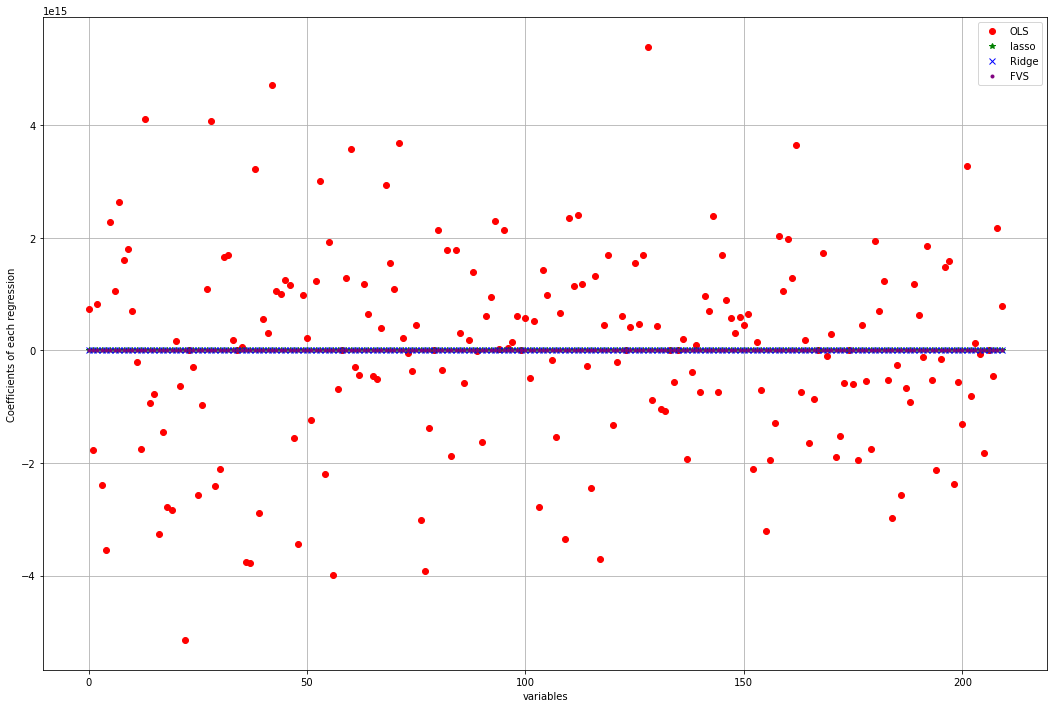

In [38]:
absc = [k for k in range(210)]
colors= ['r','g','b','purple']
form = ['o','*','x','.']

dico={}

plt.figure(figsize=(18,12))
for column,color,form in zip(df_coef.columns,colors,form):
    plt.plot(absc,df_coef[str(column)],form,color=color,label=column)
    dico[column] = len(df_coef[column][df_coef[column]==0])
    
plt.grid()
plt.legend()
plt.xlabel('variables')
plt.ylabel('Coefficients of each regression')
plt.show()


We can see that the OLS is by far the most variable regression

In [39]:
for column in df_coef.columns:
    print('The number of coefficient that are equals to zero for the ',column,'regression is ',dico[column])

The number of coefficient that are equals to zero for the  OLS regression is  0
The number of coefficient that are equals to zero for the  lasso regression is  195
The number of coefficient that are equals to zero for the  Ridge regression is  0
The number of coefficient that are equals to zero for the  FVS regression is  204


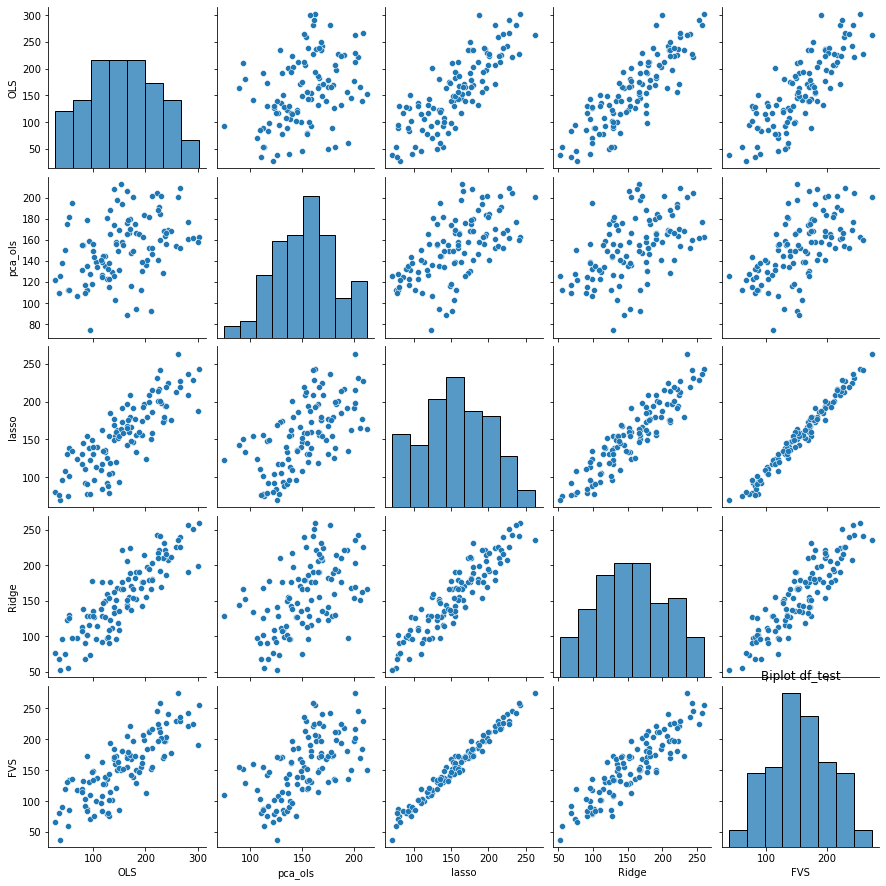

In [40]:
from seaborn import pairplot

pairplot(df_test)
plt.title("Biplot df_test")
plt.show()

In [41]:
X, Y = load_diabetes(return_X_y=True)
X = X[:,2]

reg = lr().fit(X.reshape(-1,1),Y)
theta1 = reg.coef_[0]
print("Theta1 vaut: Theta1 =",theta1)

Theta1 vaut: Theta1 = 949.4352603839492


In [42]:
alpha=0.05
n=X.shape[-1]

X1=np.vstack([[np.ones(n)],X.reshape(1,-1)]).T
G=1/(n-1)*X1.T@X1

s1=G[1,1]
sigma1=1/(n-2)*np.sum((Y-theta1*X)**2)

CI = 1/np.sqrt(n) * s1 * sigma1 *t.ppf(1-alpha/2, n-2)

Theta should be between 943.6783237083824  and  955.1921970595159


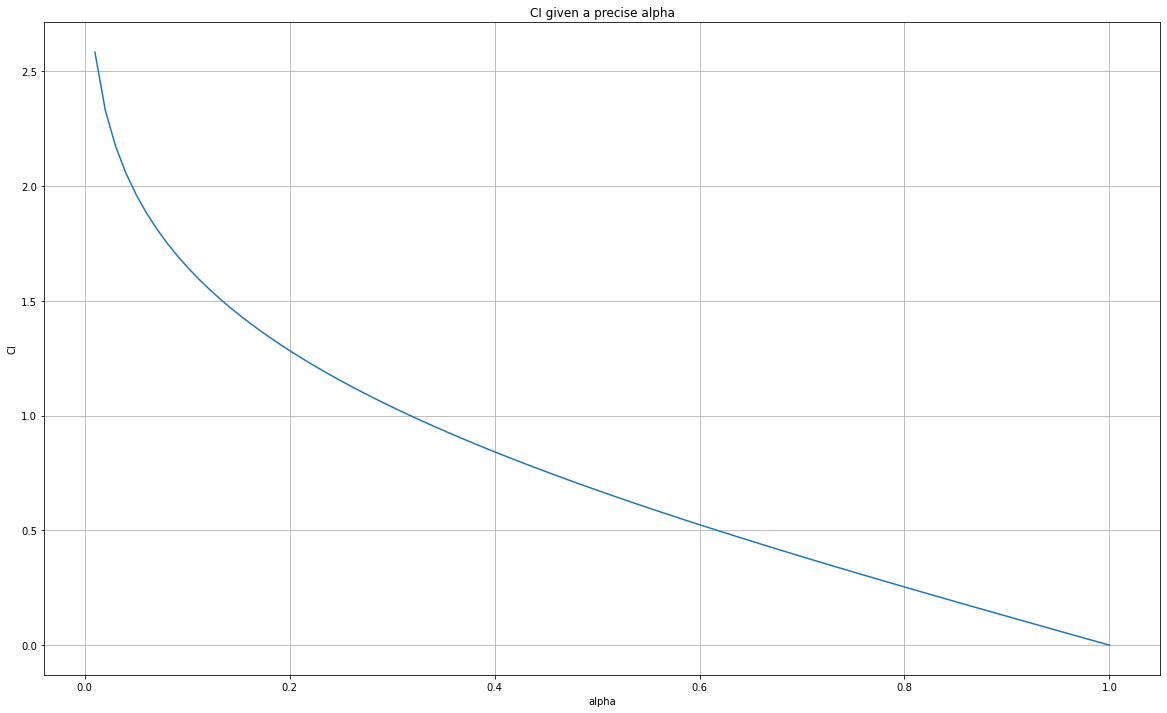

In [43]:
print('Theta should be between',theta1-CI,' and ',theta1+CI)

lin = np.linspace(0,1,100)
plt.figure(1,figsize=(20,12))
plt.grid()
plt.plot(lin,t.ppf(1-lin/2,n-2))
plt.title('CI given a precise alpha')
plt.xlabel("alpha")
plt.ylabel("CI")
plt.show()

CI decrease with α because the more alpha is little, the more we have to be precise and therefore the confience interval is precaucious, therefore bigger.